1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number

    3. a. Use elbow method as baseline
    
    3. b. Apply other methods to compare with elbow

4. Use Pipeline

    4. a. Use scaler and dimensional reduction (if it is necessary).

    4. b. Use suitable clustering model for this problem. 
    
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

<div align='left'>
    <h1 style="color: #FFA500; font-size: 36px; font-weight: bold;">[HW04] INTRODUCTION TO MACHINE LEARNING</h1>
</div>

> **Sinh viên:** Nguyễn Công Hoài Nam  
> **Mã số sinh viên:** 21280099

# **Load Dataset**

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
DATA_PATH = r"D:\\Courses HK2 23-24\\Machine Learning\\LAB\\Week 04\\Clustered_Customer_Data.csv"
df = pd.read_csv(DATA_PATH)

## Features description

`BALANCE`: Số dư còn lại trong tài khoản.

`BALANCE_FREQUENCY`: Tần suất cập nhật số dư, với giá trị từ 0 đến 1 (1 = cập nhật thường xuyên, 0 = không cập nhật thường xuyên).

`PURCHASES`: Tổng số tiền mua hàng.

`ONEOFF_PURCHASES`: Số tiền tối đa trong một lần mua hàng.

`INSTALLMENTS_PURCHASES`: Số tiền mua hàng trả góp.

`CASH_ADVANCE`: Tiền ứng trước.

`PURCHASES_FREQUENCY`: Tần suất mua hàng, với giá trị từ 0 đến 1 (1 = mua hàng thường xuyên, 0 = không mua hàng thường xuyên).

`ONEOFF_PURCHASES_FREQUENCY`: Tần suất mua hàng, với giá trị từ 0 đến 1 (1 = mua hàng một lần thường xuyên, 0 = không mua hàng một lần thường xuyên) (Số thực).

`PURCHASES_INSTALLMENTS_FREQUENCY`: Tần suất mua hàng trả góp, với giá trị từ 0 đến 1 (1 = mua hàng trả góp thường xuyên, 0 = không mua hàng trả góp thường xuyên) (Số thực).

`CASH_ADVANCE_FREQUENCY`: Tần suất ứng tiền mặt, với giá trị từ 0 đến 1 (1 = ứng tiền mặt thường xuyên, 0 = không ứng tiền mặt thường xuyên) (Số thực).

`CASH_ADVANCE_TRX`: Số lượng giao dịch tiền ứng trước.

`PURCHASES_TRX`: Số lượng giao dịch mua hàng.

`CREDIT_LIMIT`: Hạn mức tín dụng của thẻ tín dụng.

`PAYMENTS`: Tổng số tiền thanh toán.

`MINIMUM_PAYMENTS`: Số tiền thanh toán tối thiểu.

`PRC_FULL_PAYMENT`: Tỷ lệ phần trăm thanh toán đầy đủ.

`TENURE`: Thời gian sử dụng dịch vụ thẻ tín dụng.

In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8950.0,4474.500000,2583.786788,0.000000,2237.250000,4474.500000,6711.750000,8949.00000
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000


# **Data Analysis**

## Handle missing values

In [6]:
df.isnull().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

=> dataset doesn't have missing values

## Show histogram plot with kde plot 

In [7]:
float_cols = [col for col in df.columns if df[col].dtypes=="float64"]
int_cols = [col for col in df.columns if df[col].dtypes=="int64"]

In [8]:
int_cols

['Unnamed: 0', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE', 'Cluster']

In [9]:
col_names = df.columns[1:-1]  

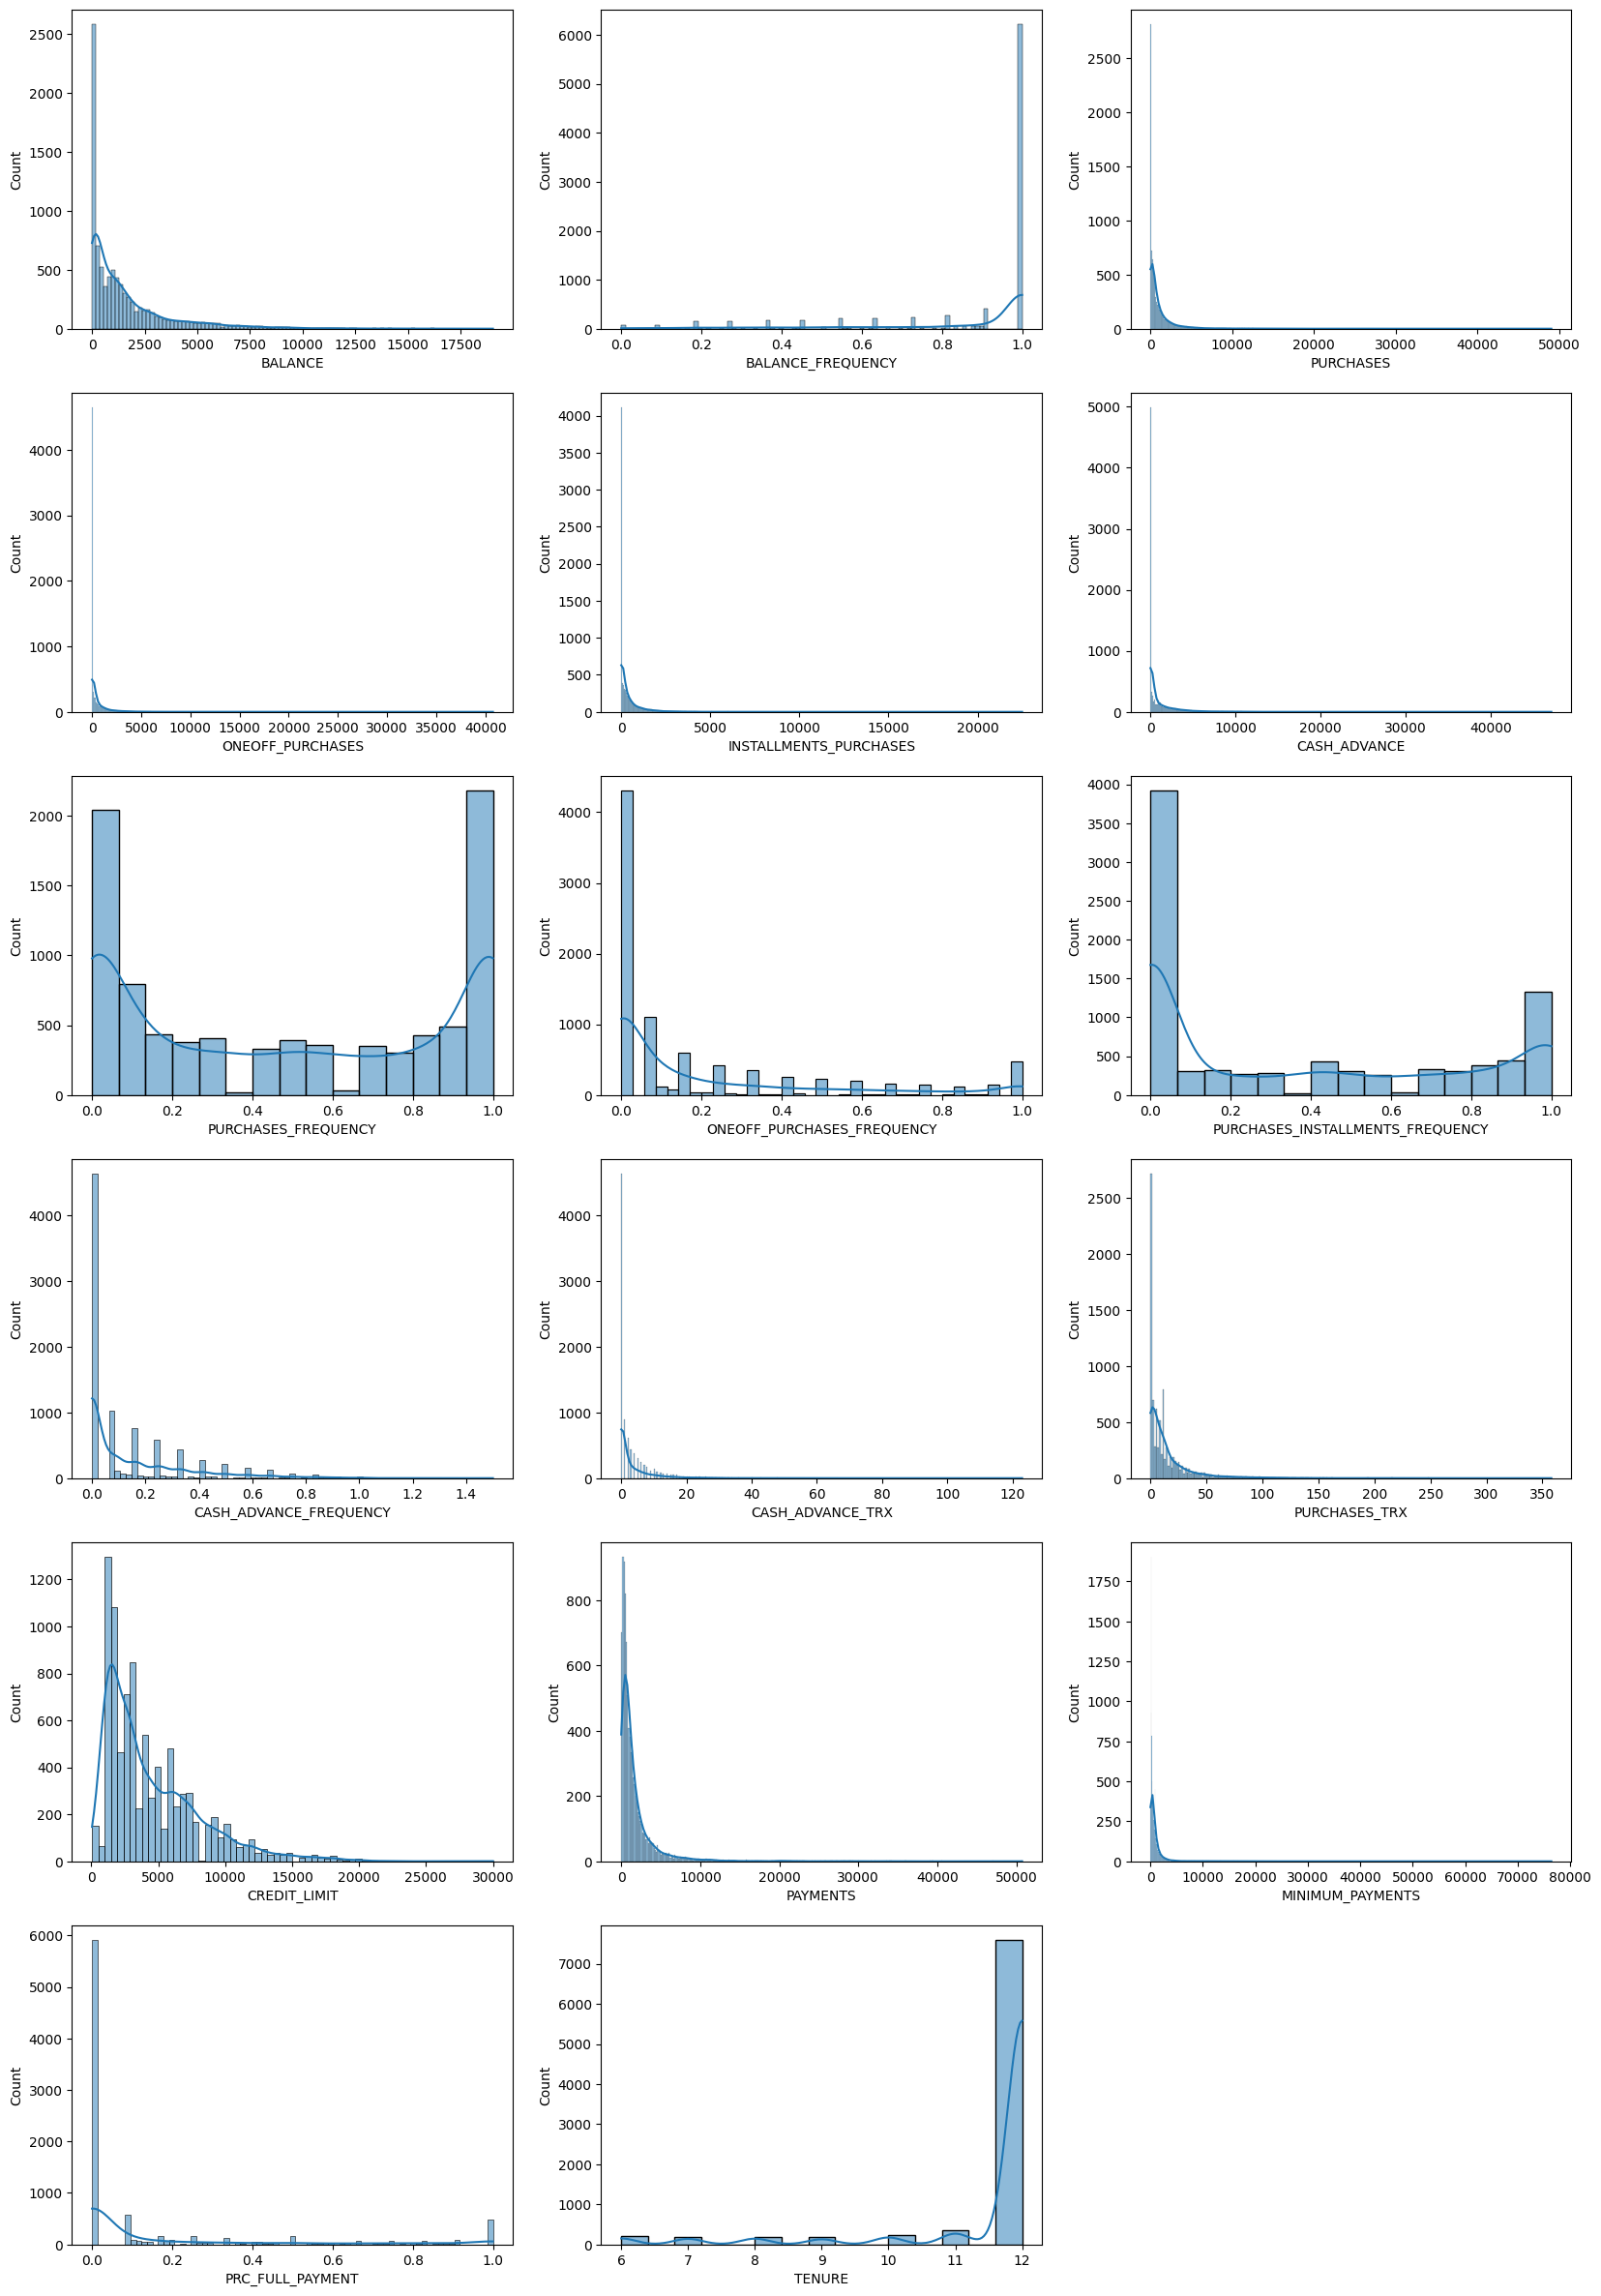

In [10]:
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(col_names):
    axes = fig.add_subplot(6, 3, i+1)
    sns.histplot(df[v], kde = True, ax = axes)

Dữ liệu không phân bố đồng đều mà bị lệch về một phía

## Outliers Detection

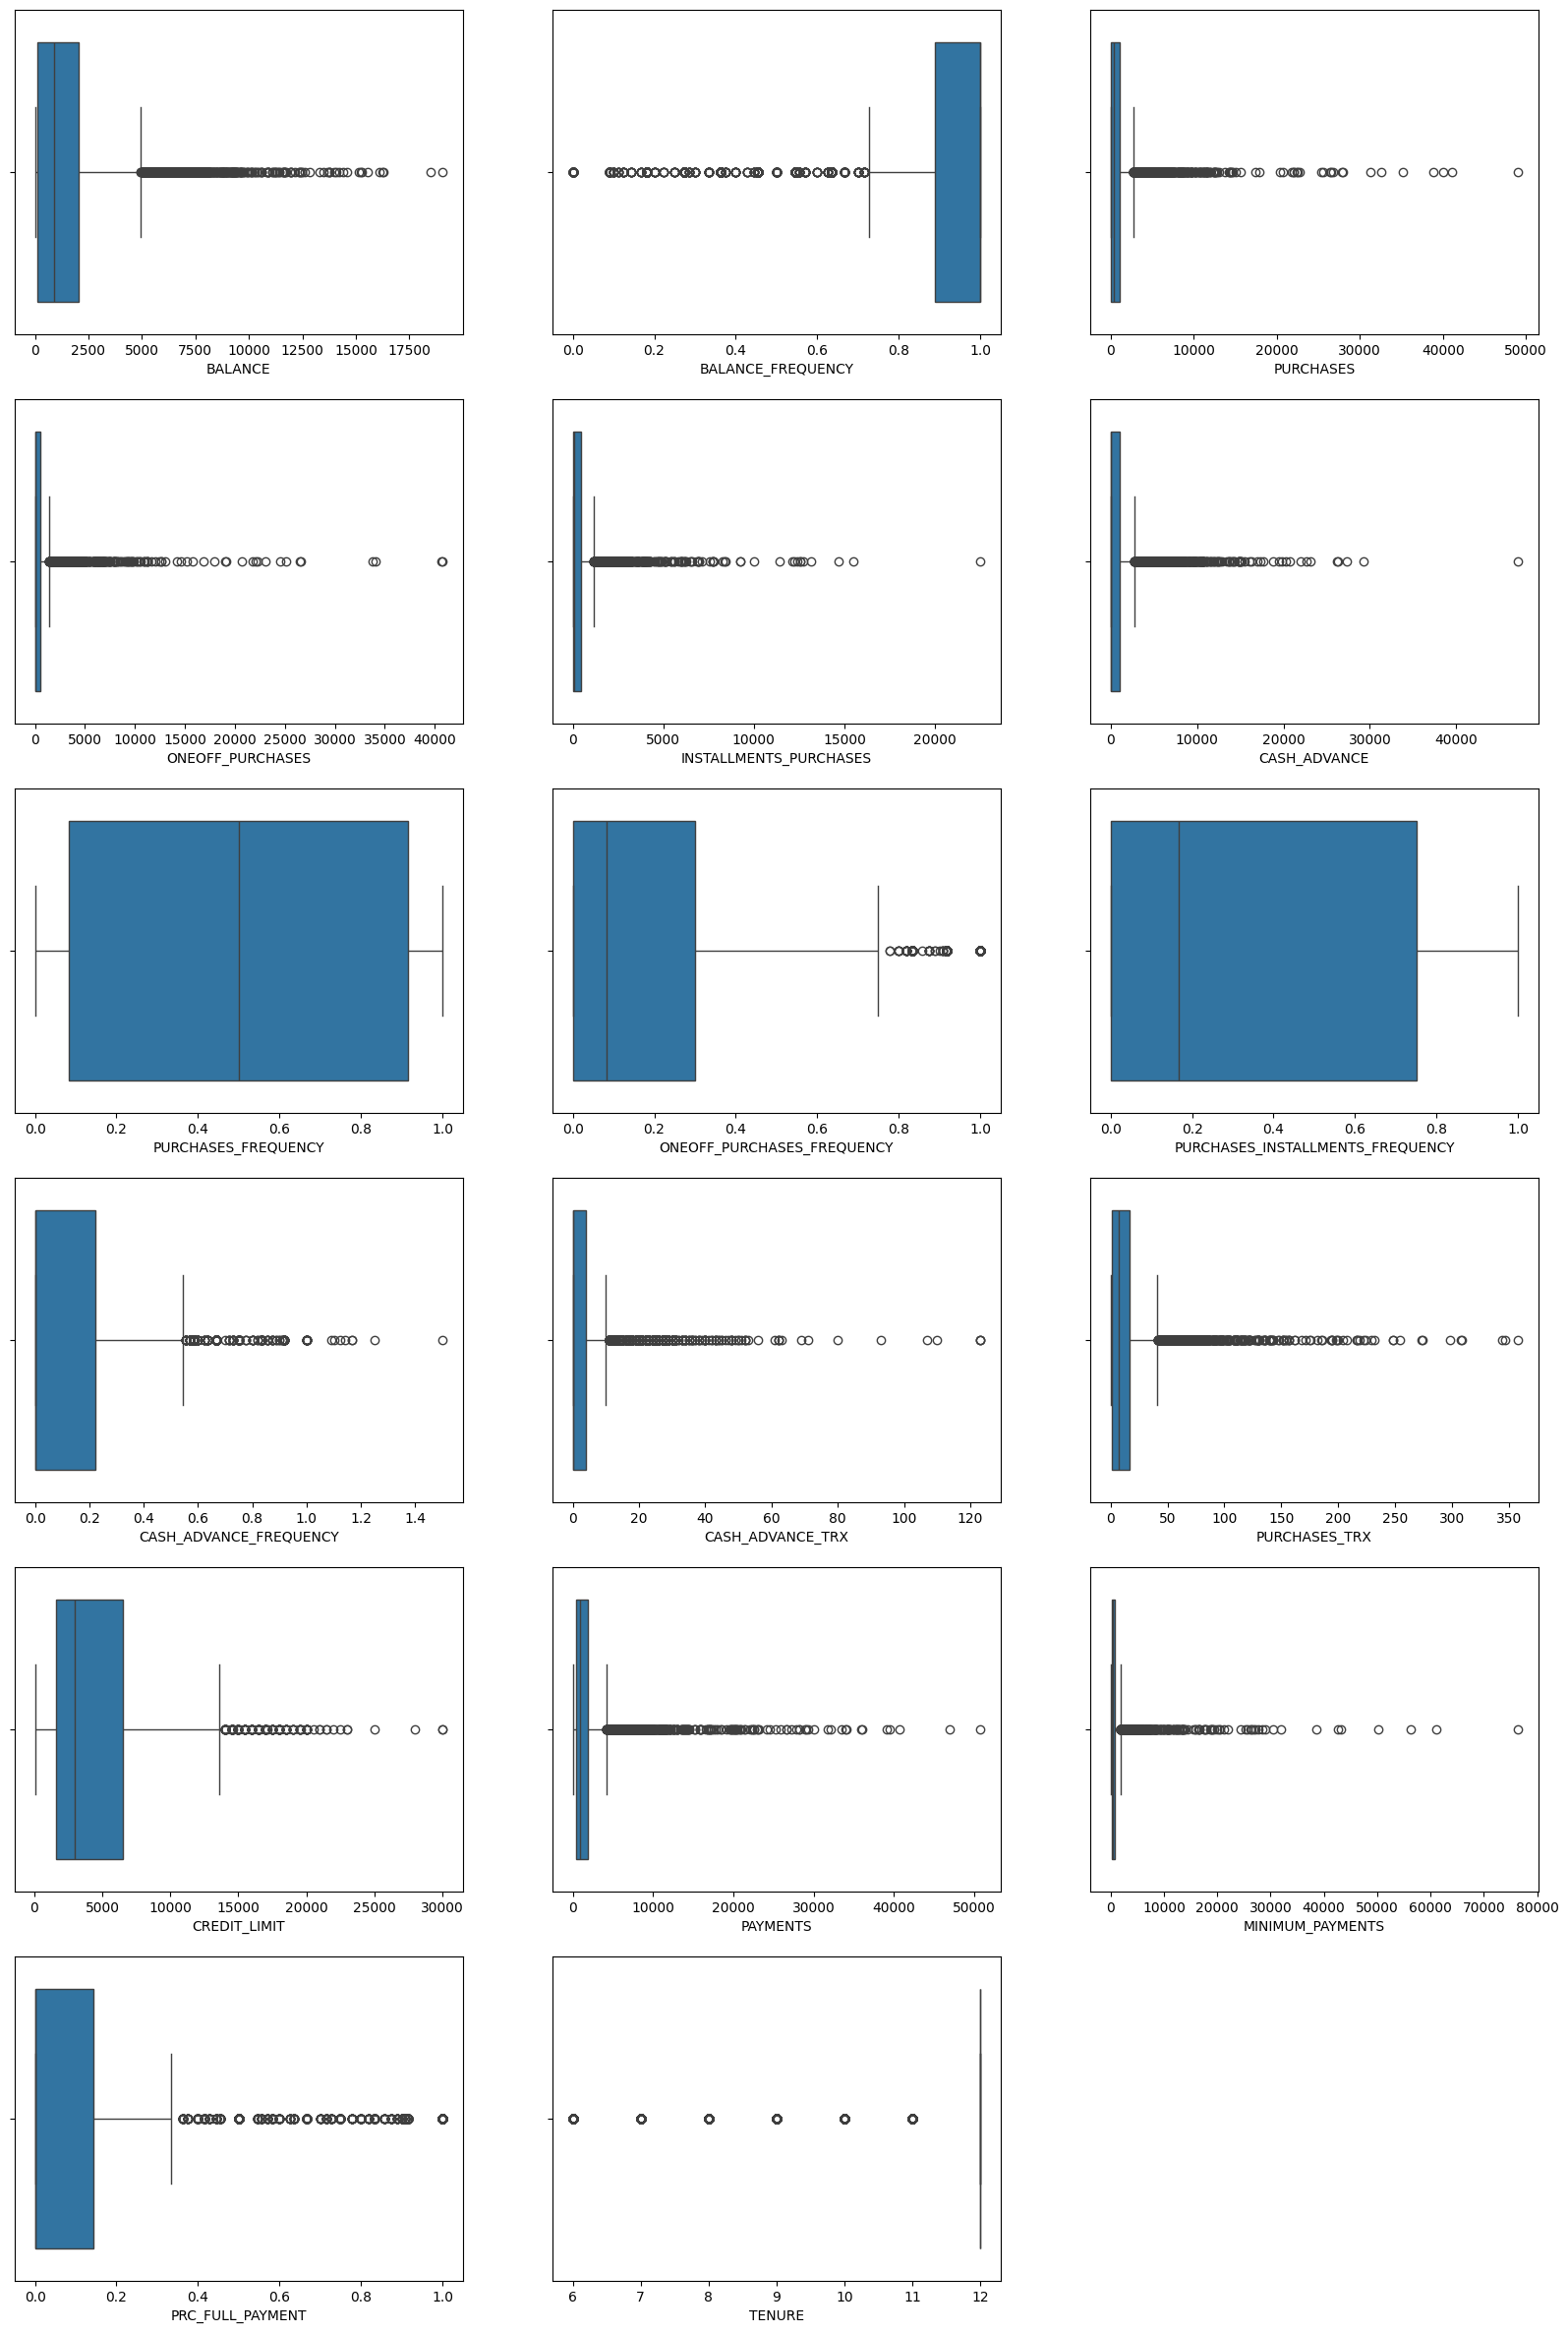

In [11]:
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(col_names):
    axes = fig.add_subplot(6, 3, i+1)
    sns.boxplot(x = df[v], ax = axes)

Dữ liệu có khá nhiều outliers

<Axes: >

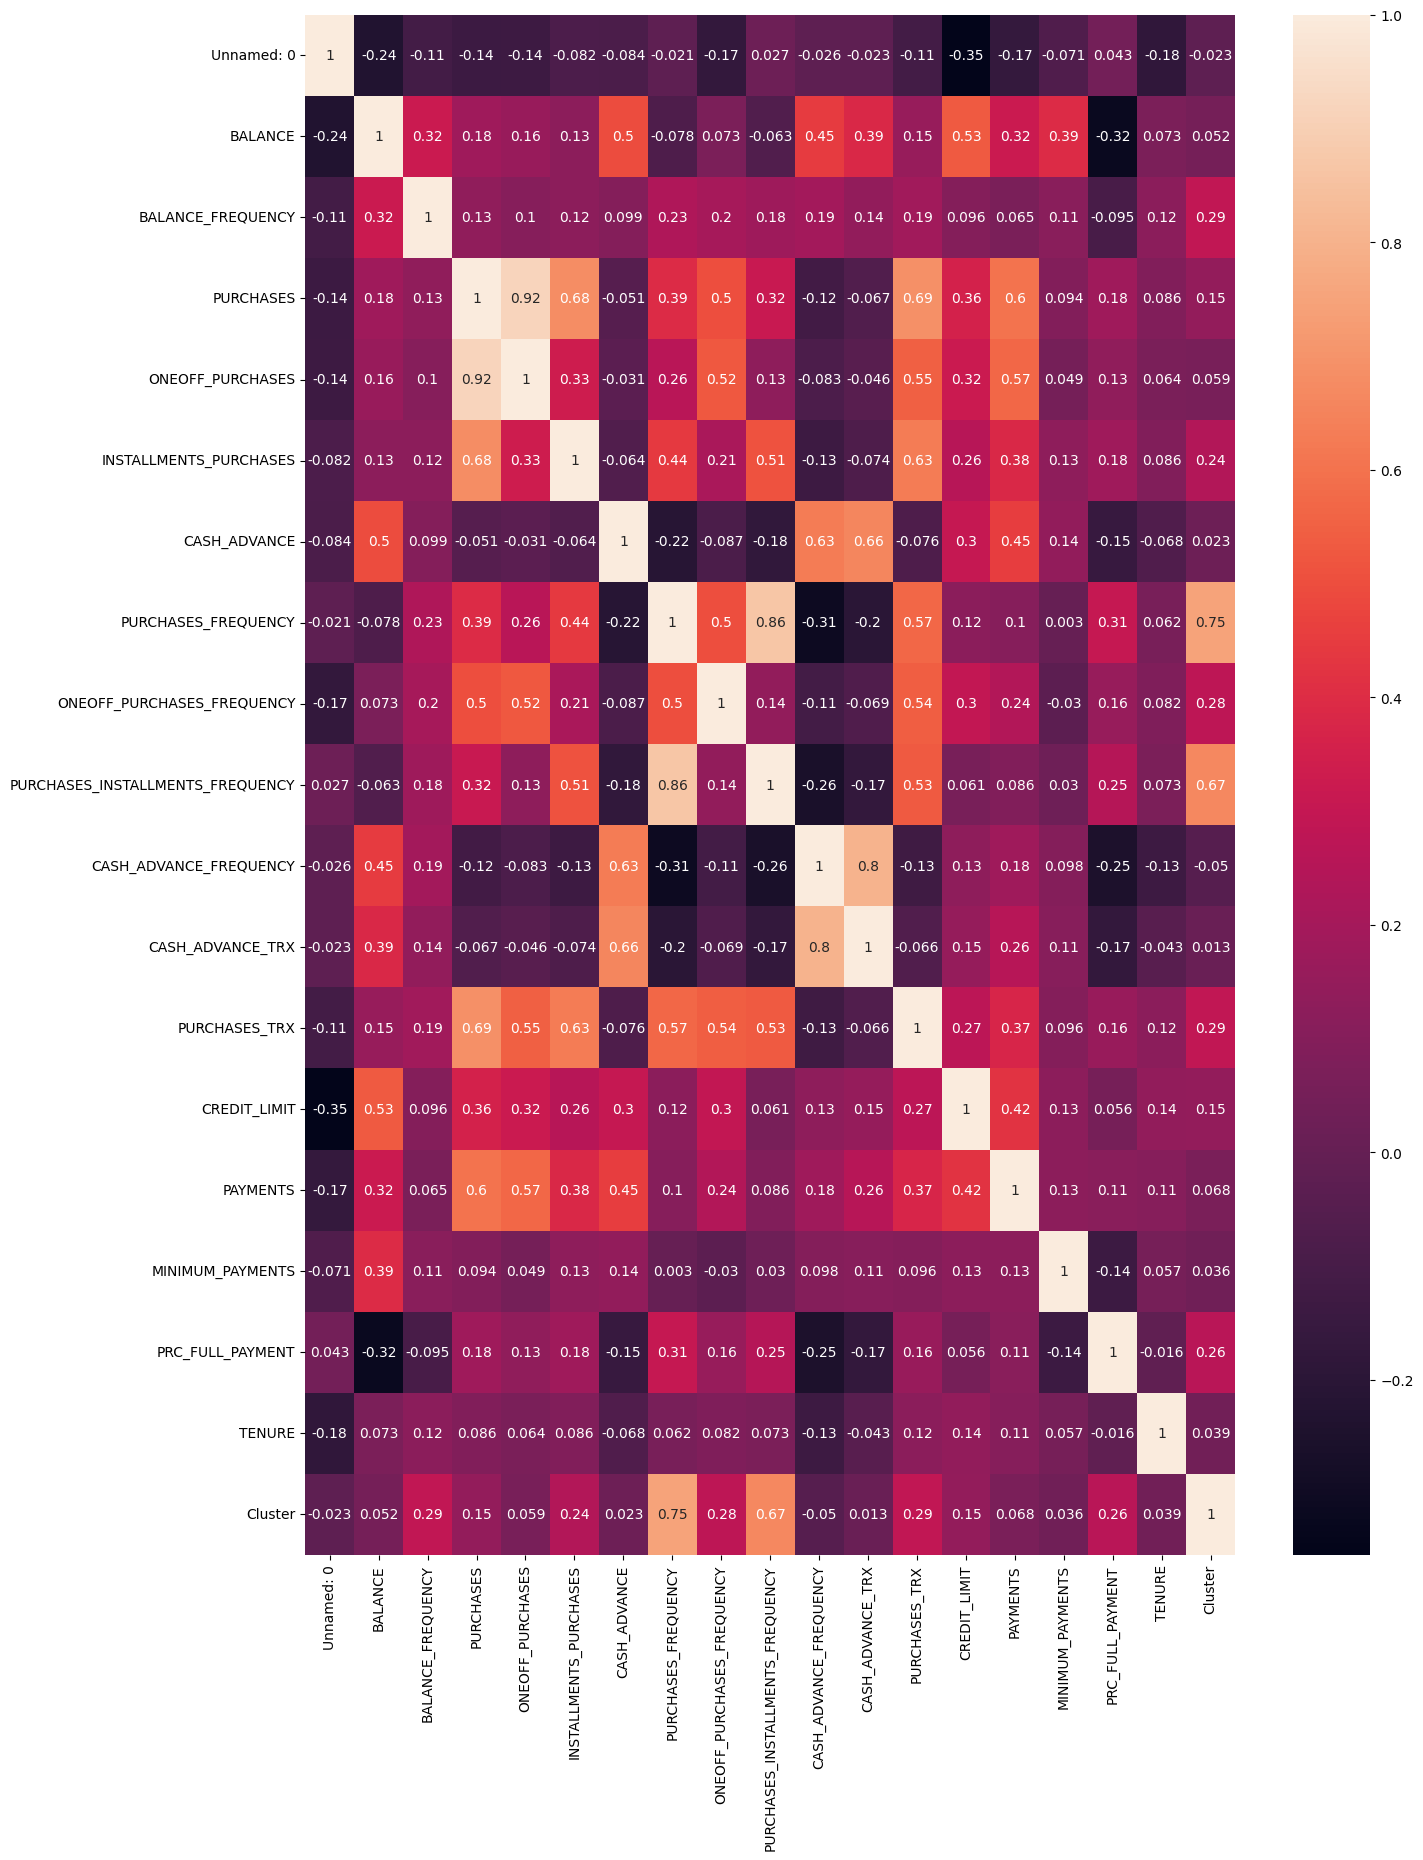

In [12]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# **Data Preprocessing**

Loại bỏ column không cần thiết và tạo bản copy tránh ảnh hưởng đến data gốc

In [13]:
data = df.copy()
data = data.drop("Unnamed: 0", axis = 1)
data.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000


Vì data có khá nhiều outliers nên ta loại bỏ outliers ở mức $\left[Q1 - 3*IQR,Q3 + 3*IQR\right]$

Chọn lấy 3 lần khoảng tứ phân vị vì như đã nói dữ liệu có nhiều giá trị outliers, đối số 1.5 có thể quá nghiêm ngặt và loại bỏ nhầm các giá trị hợp lệ

In [14]:
for col in data.columns:
    Q1 = data[col].quantile(0.25) 
    Q3 = data[col].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

Chuẩn hoá dữ liệu 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)
df_scaled = pd.DataFrame(data_scaled, columns = data.columns)

Kiểm tra lại sau khi xử lý

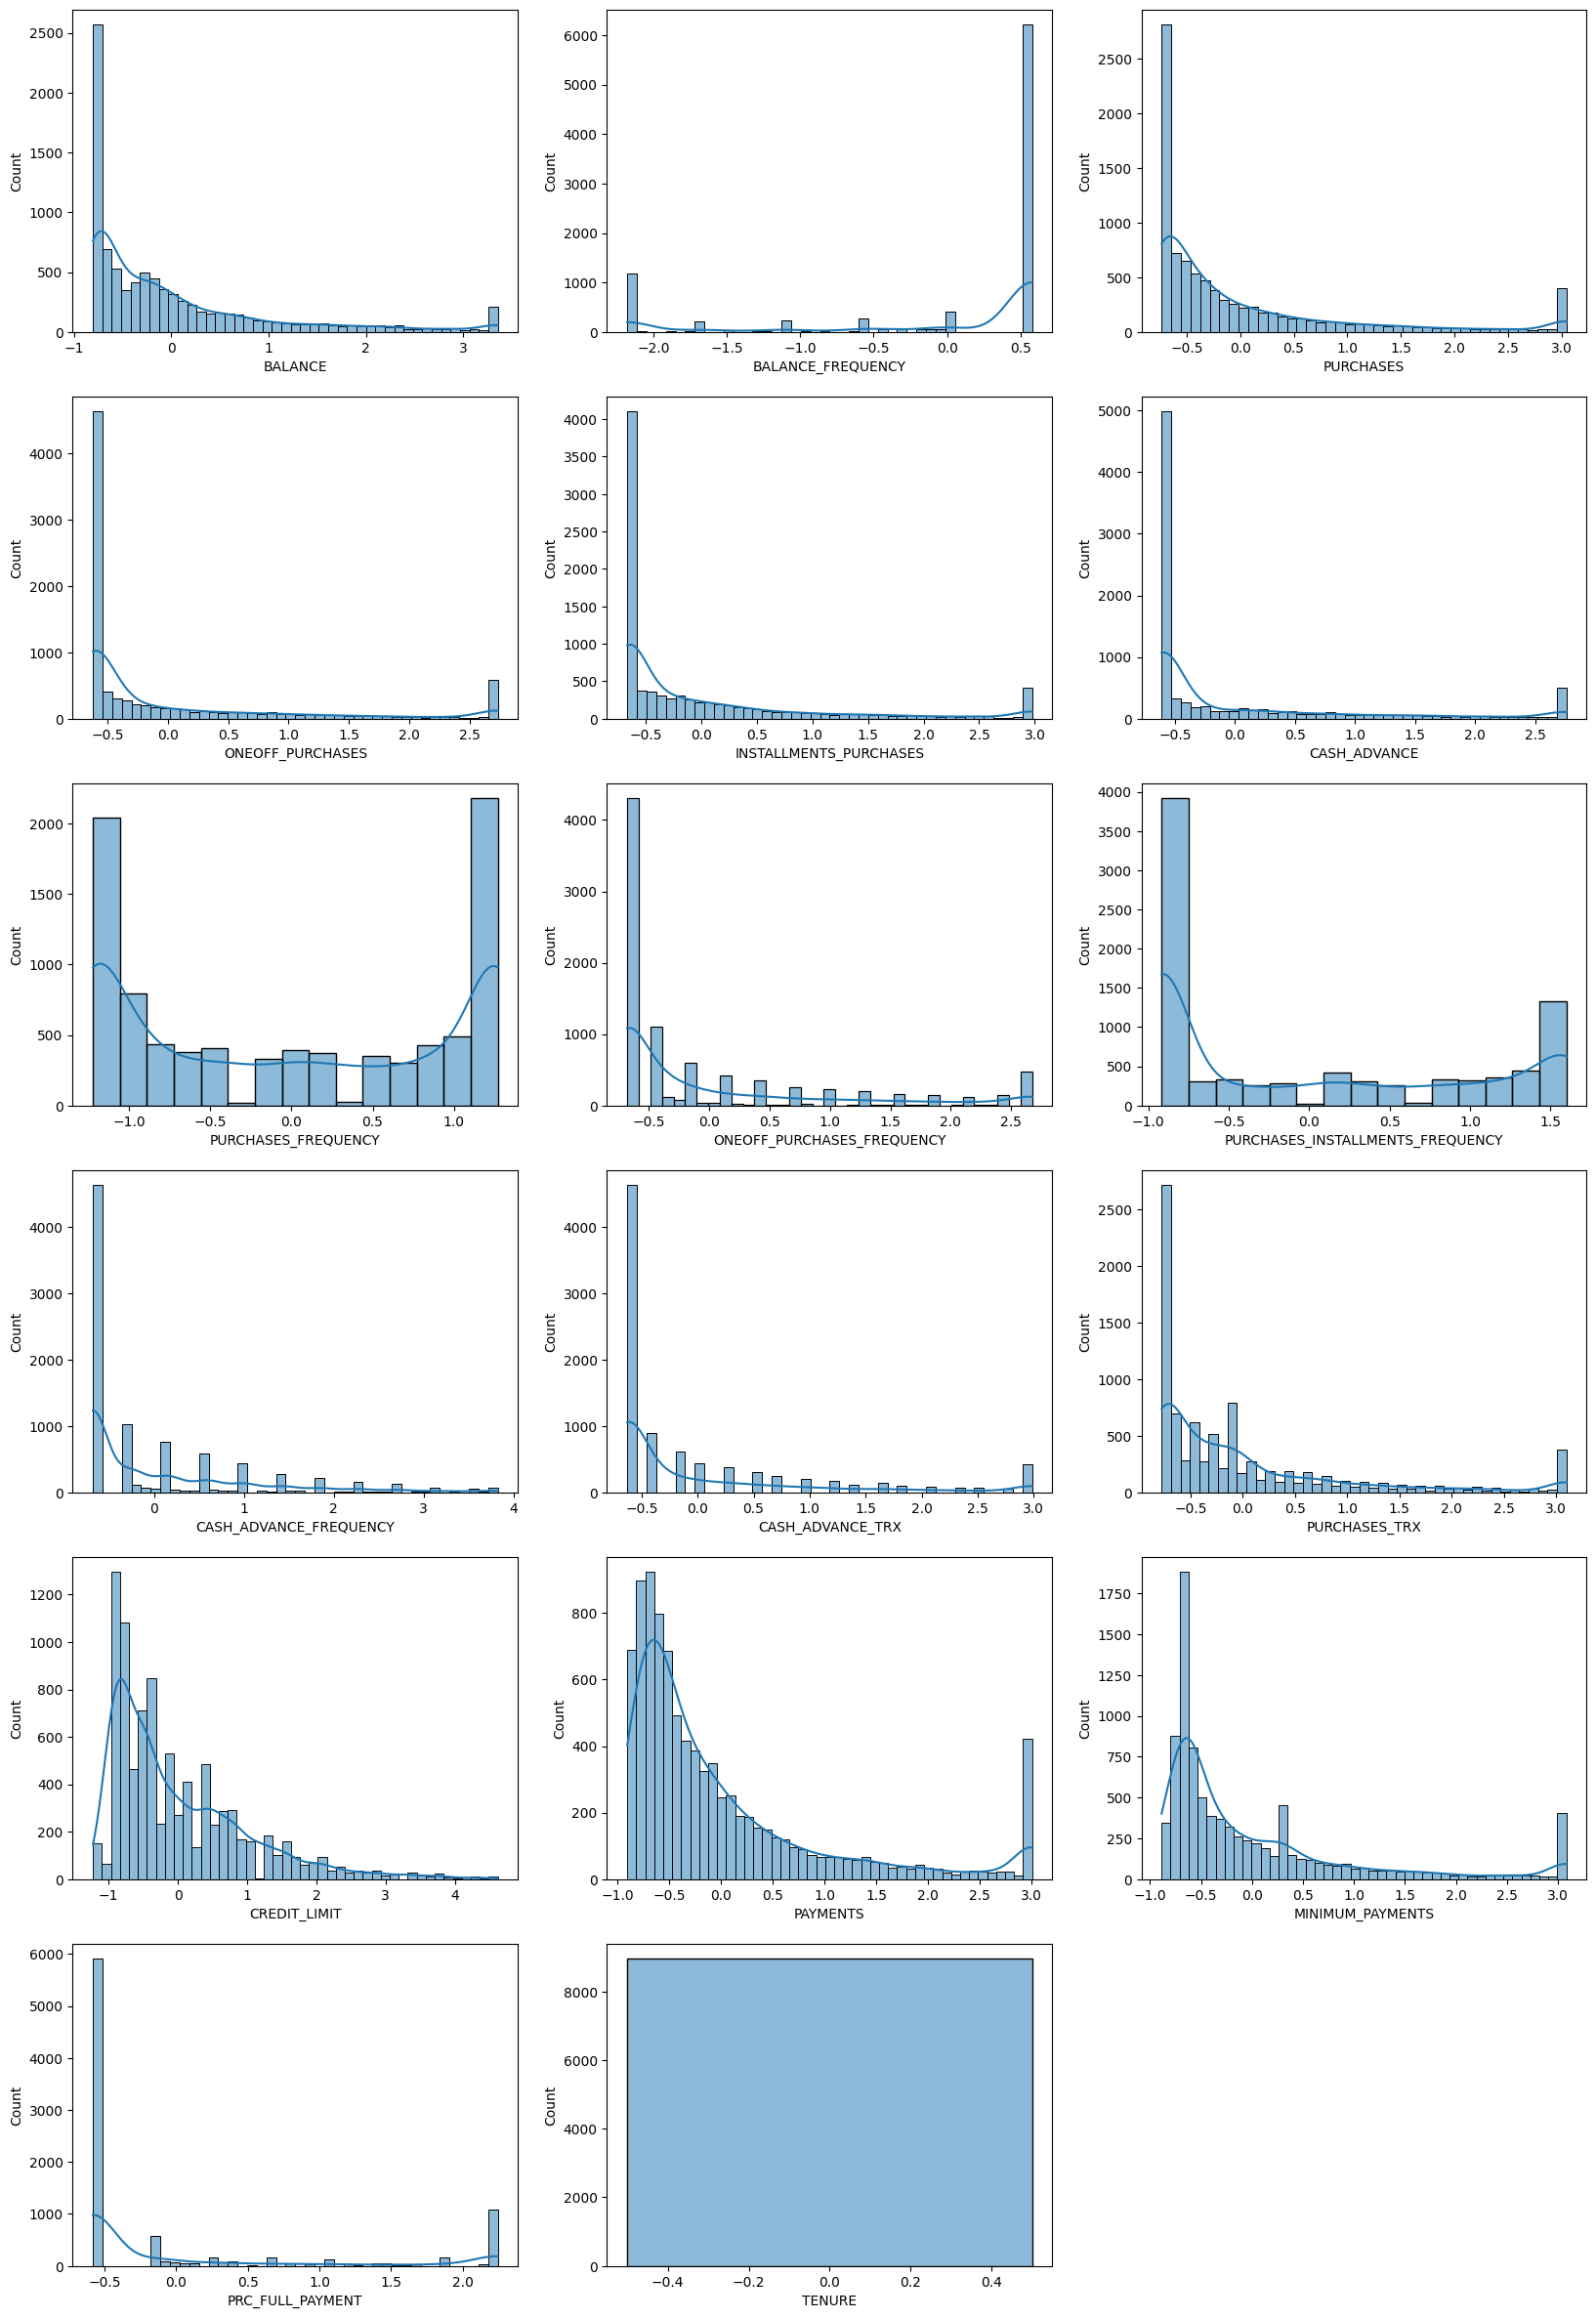

In [16]:
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(col_names):
    axes = fig.add_subplot(6, 3, i+1)
    sns.histplot(df_scaled[v], kde = True, ax = axes)

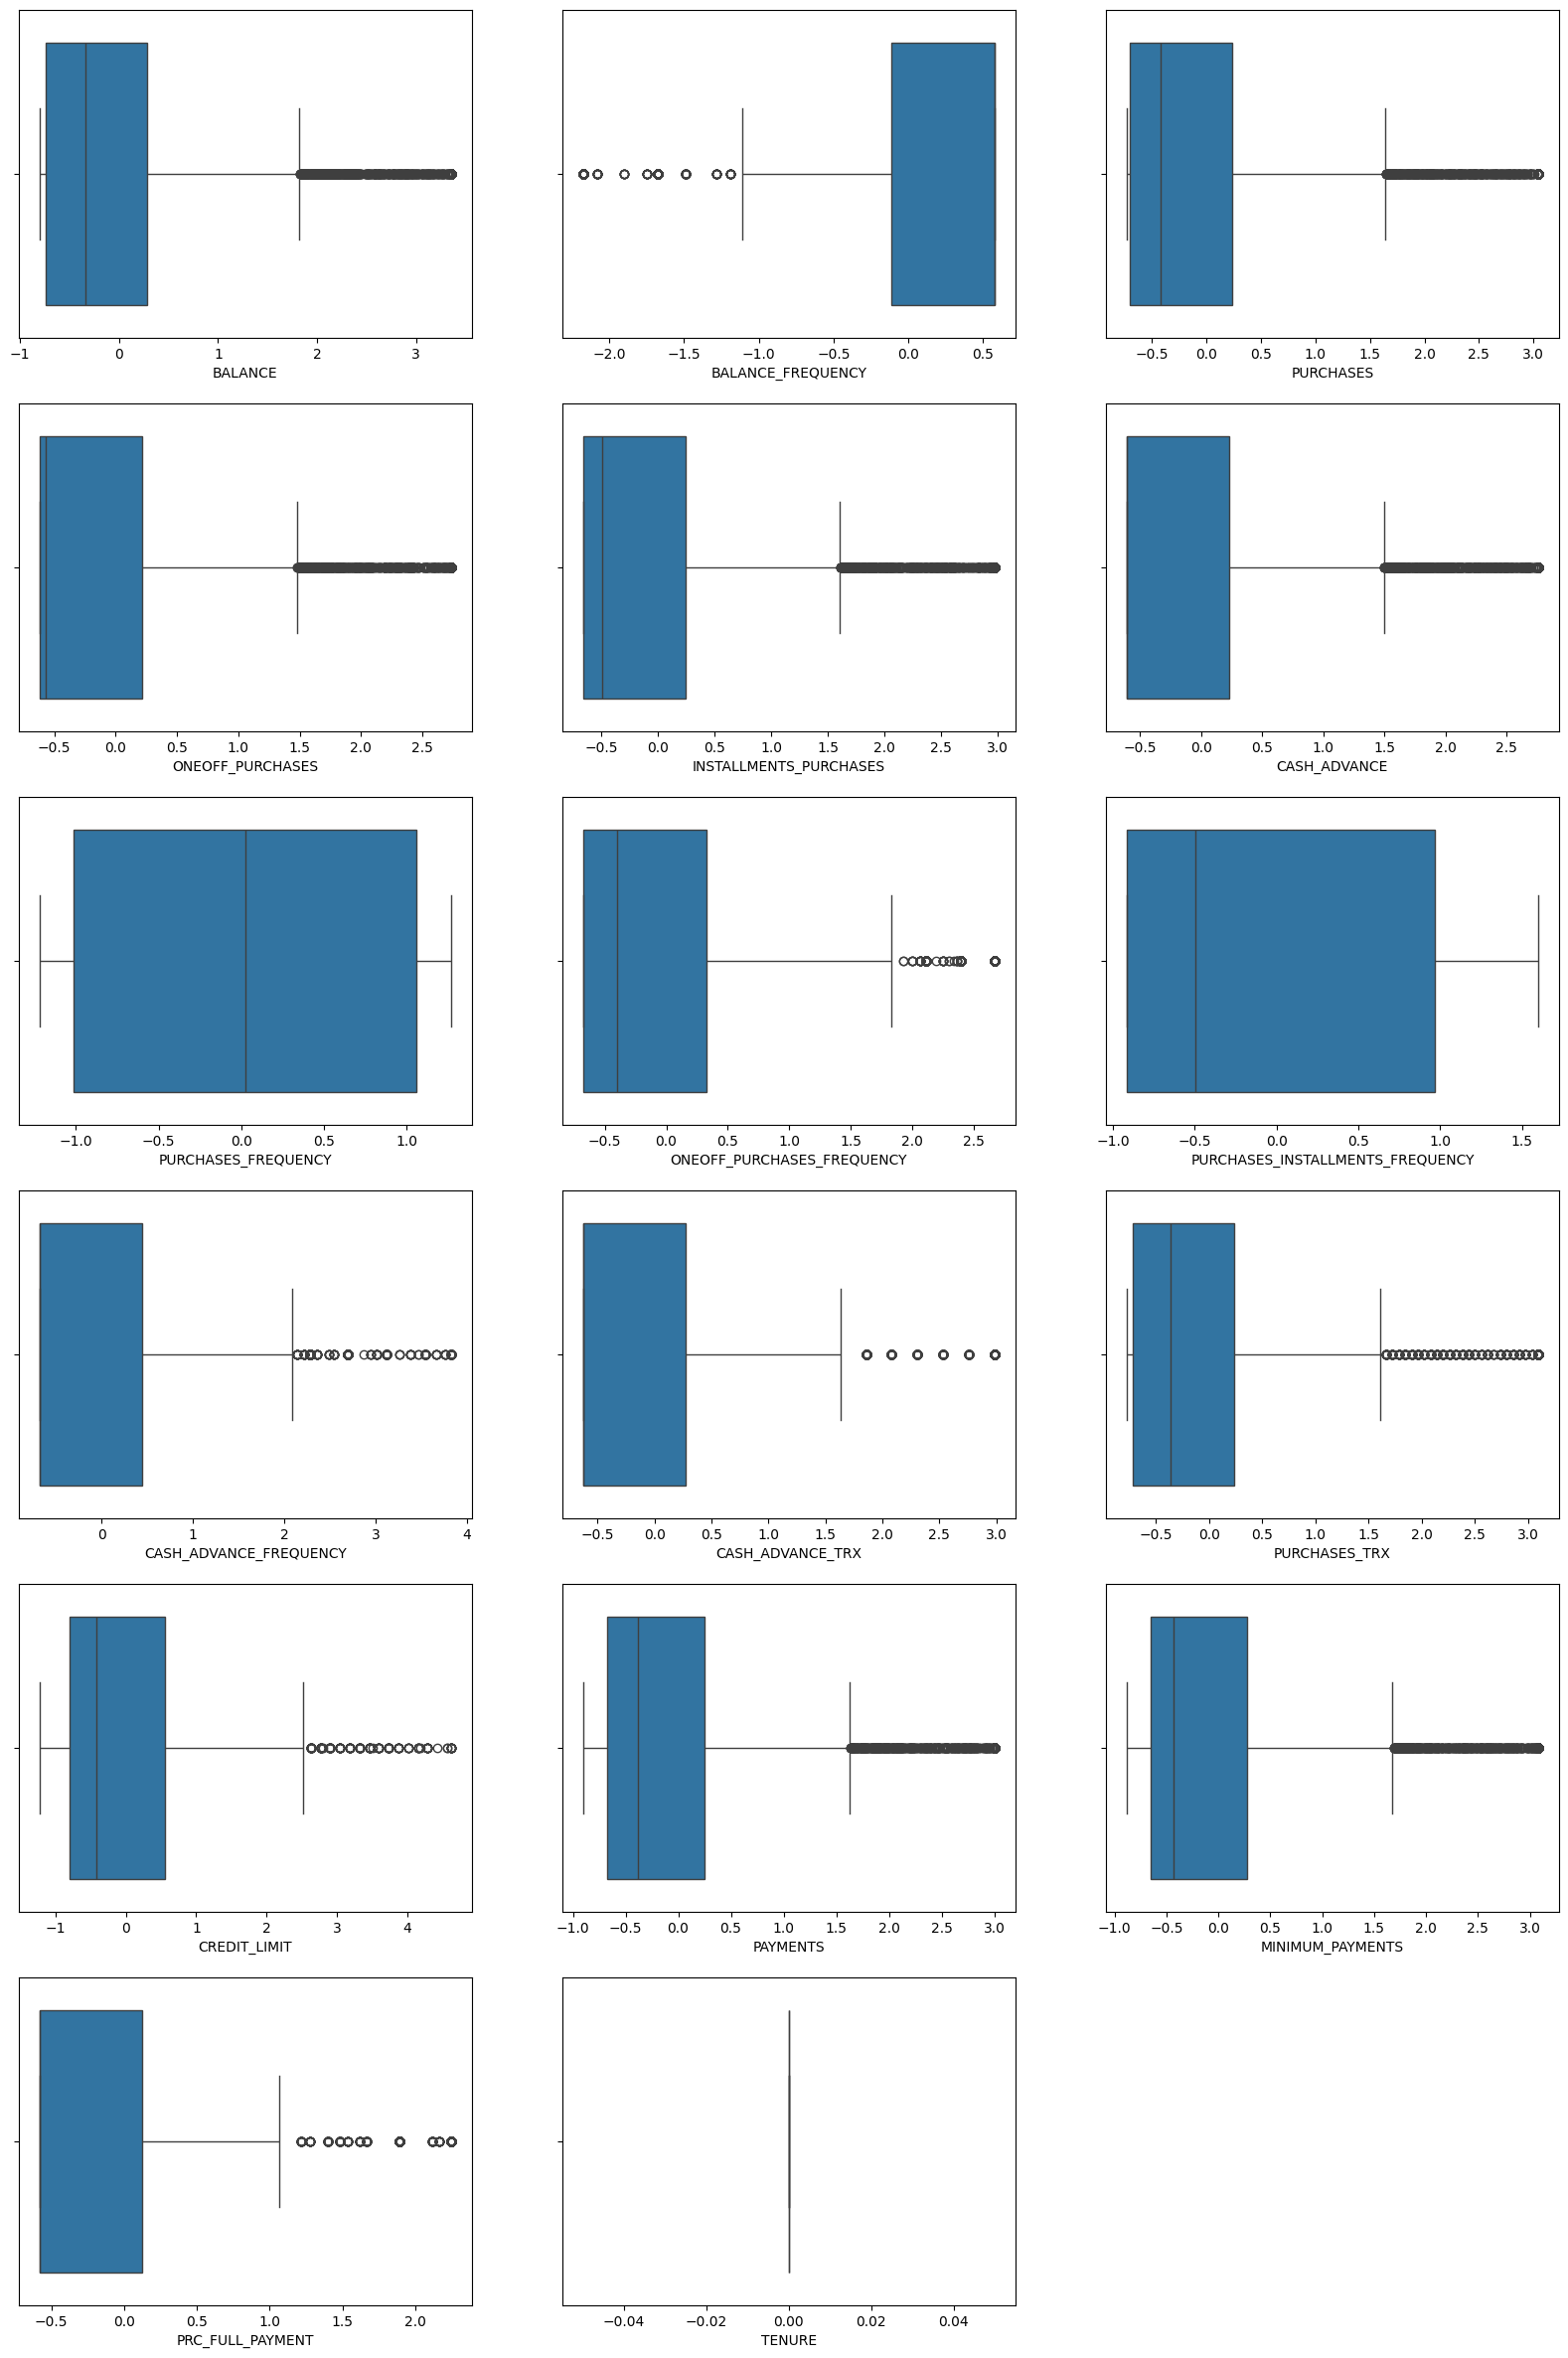

In [17]:
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(col_names):
    axes = fig.add_subplot(6, 3, i+1)
    sns.boxplot(x = df_scaled[v], ax = axes)

# **Feature Engineering**

In [18]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score


## K-Means

### Elbow method

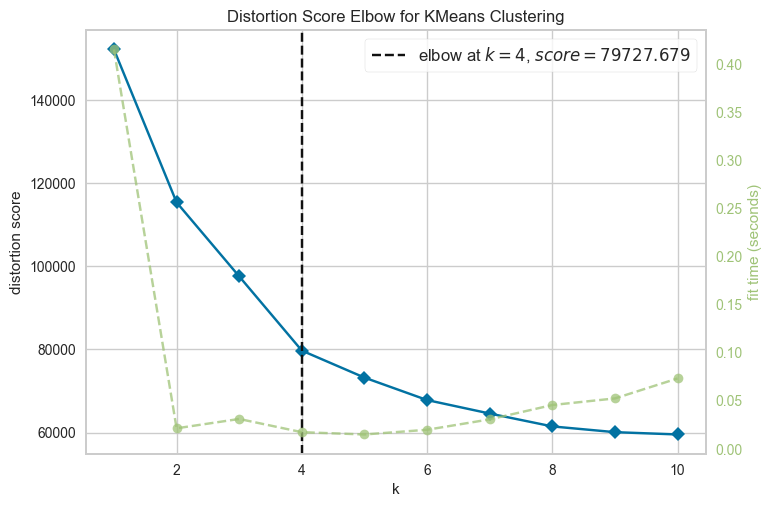

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(data_scaled)
elbow_method.show()

## Silhoutte Score

In [20]:
# Silhoutee Method
from sklearn.metrics import silhouette_score
silhouette_coefs = []

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    silhouette_coefs.append(silhouette_score(data_scaled, model.labels_))

# Tìm số lượng cụm có silhouette score cao nhất
optimal_clusters = int(range(2, 21)[np.argmax(silhouette_coefs)])


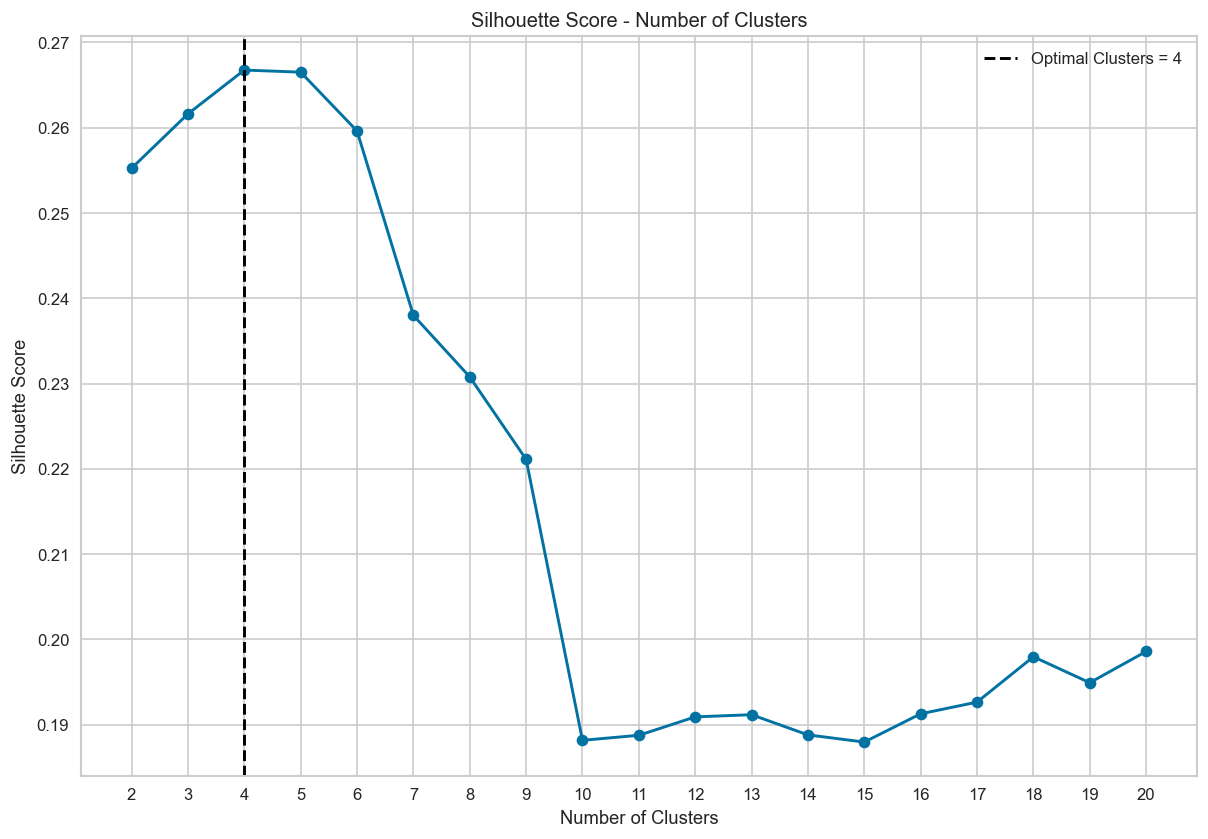

In [21]:
plt.figure(figsize=(12, 8), dpi=120)
plt.plot(range(2, 21), silhouette_coefs, color='b', marker='o')
plt.axvline(x=optimal_clusters, color='black', linestyle='--', label=f'Optimal Clusters = {optimal_clusters}')
plt.xlabel('Number of Clusters') 
plt.xticks(range(2, 21)) 
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Number of Clusters')
plt.legend()
plt.show()

cluster = 4

## Agglomerative Clustering 

Text(0, 0.5, 'dissimilarity metric cluster')

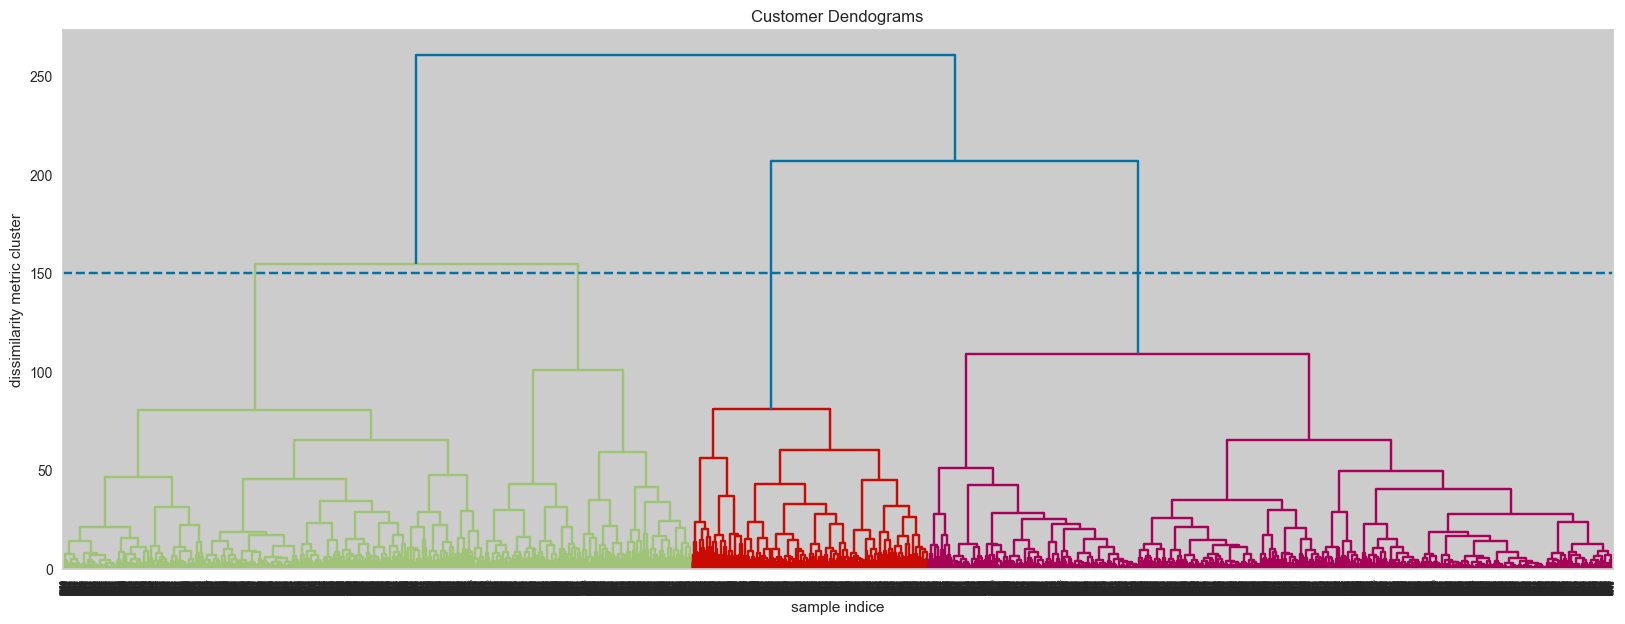

In [22]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(150, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Cắt 4 đường nên số cluster là 4

# Model Part

## Import Library

In [23]:
import plotly.express as px 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Pipeline K-Means Clustering

Pipeline cho phân cụm kmeans gồm chuẩn hoá, pca, kmeans

In [24]:
def k_means_pipeline(data, n_clusters, n_components):
    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),                # Standardize the data
        ('pca', PCA(n_components=n_components)),     # PCA
        ('kmeans', KMeans(n_clusters=n_clusters))    # KMeans
    ])

    # Fit the pipeline to your data
    pipeline.fit(data)
    
    # Transform the data using the fitted pipeline
    data_scaled = pipeline.named_steps['scaler'].transform(data)
    pca_components = pipeline.named_steps['pca'].transform(data_scaled)
    kmeans_model = pipeline.named_steps['kmeans']
    
    return pca_components, kmeans_model


Trực quan hoá dữ liệu sau phân cụm

### 2-dimensional

In [25]:
def visualize_2d(pca_components, kmeans_model):
    # Plot the data in 2D
    plt.figure(figsize=(12, 7))
    ax = plt.subplot()
    group = kmeans_model.labels_
    unique_groups = np.unique(group)

    # Use a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))

    for g, color in zip(unique_groups, colors):
        ix = np.where(group == g)
        ax.scatter(pca_components[ix, 0], pca_components[ix, 1], label=f'Cluster {g}', c=[color])
    
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    # plt.title("2D Visualization of Clustered Data")
    plt.legend()
    plt.show


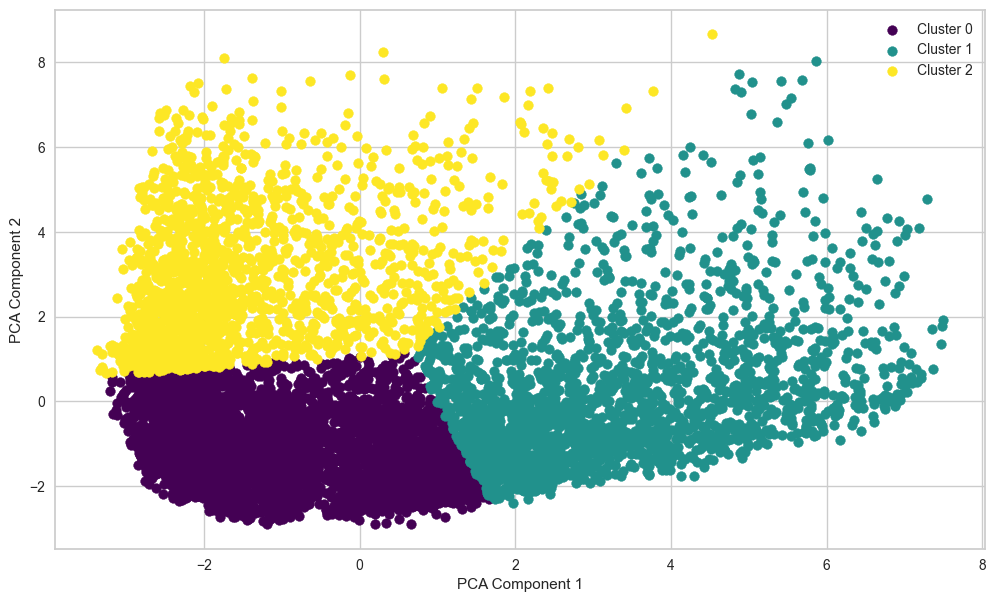

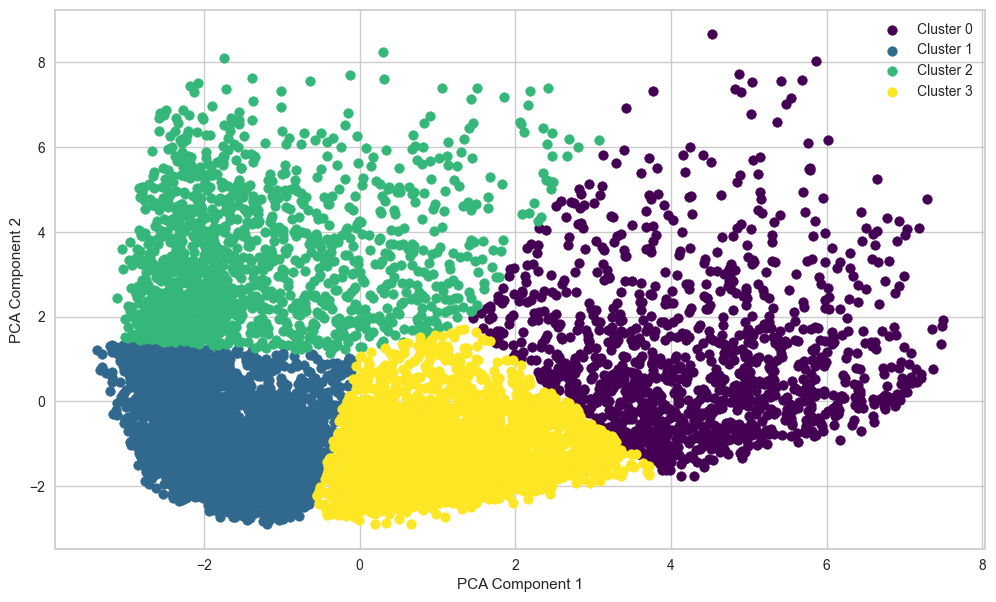

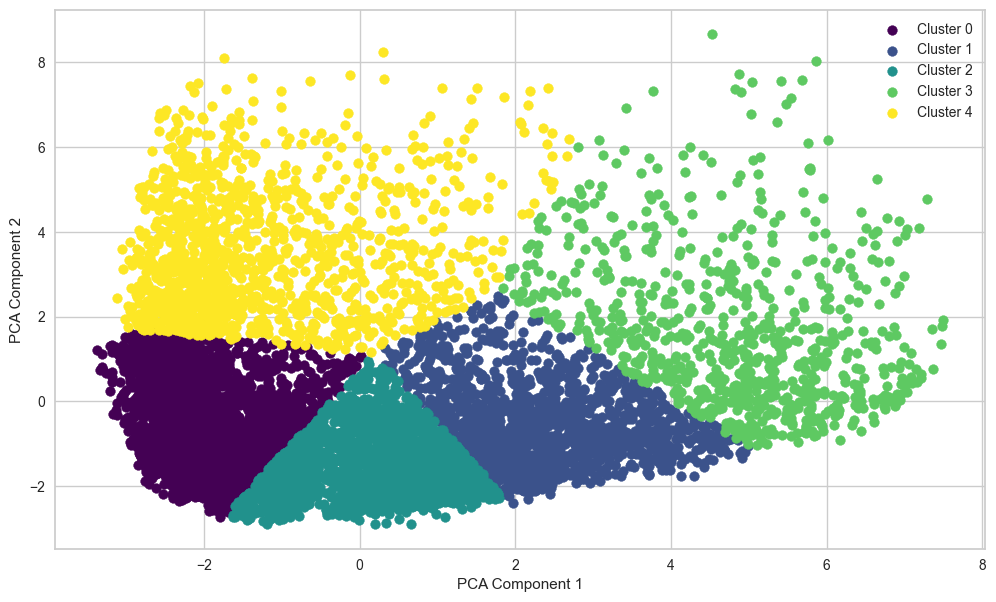

In [26]:
for i in range(3,6):
    pca_components, kmeans_model = k_means_pipeline(data_scaled, n_clusters=i, n_components=2)
    visualize_2d(pca_components, kmeans_model)

Vậy 4 cluster cho kết quả tốt nhất như dự đoán

### 3-dimensional

In [27]:

def visualize_3d(pca_components, kmeans_model):
    # Plot the data in 3D
    plt.figure(figsize=(12, 7))
    ax = plt.subplot(projection="3d")
    group = kmeans_model.labels_
    unique_groups = np.unique(group)

    # Use a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))

    for g, color in zip(unique_groups, colors):
        ix = np.where(group == g)
        ax.scatter(pca_components[ix, 0], pca_components[ix, 1],pca_components[ix, 2], label=f'Cluster {g}', c=[color])
    
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")

    plt.title("3D Visualization of Clustered Data")
    plt.legend()
    plt.show()

def visualize_interaction_3d(pca_components, kmeans_model):
    # Create a 3D scatter plot using Plotly
    fig = px.scatter_3d(
        x=pca_components[:, 0], 
        y=pca_components[:, 1], 
        z=pca_components[:, 2], 
        color=kmeans_model.labels_.astype(str),
        title="3D Visualization of Clustered Data",
        labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'z': 'PCA Component 3'},
        width=800, 
        height=400,
    )
    
    # Tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()


In [28]:
pca_components, kmeans_model = k_means_pipeline(data_scaled, n_clusters=4, n_components=3)

visualize_interaction_3d(pca_components, kmeans_model)

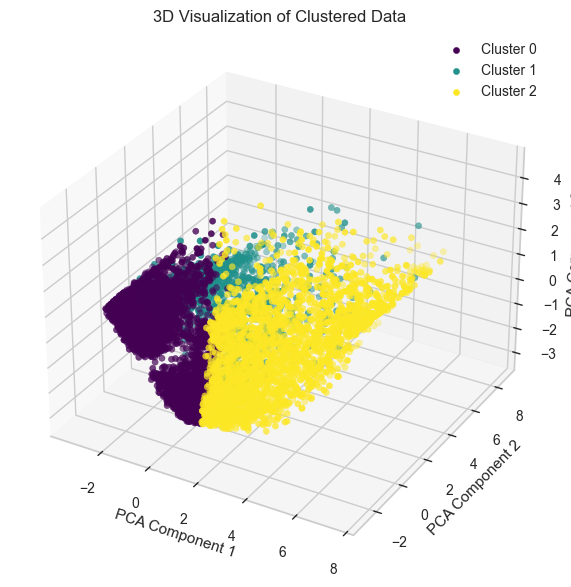

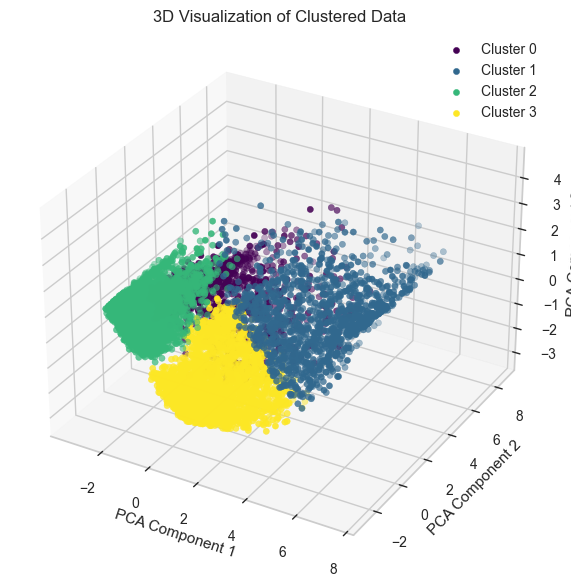

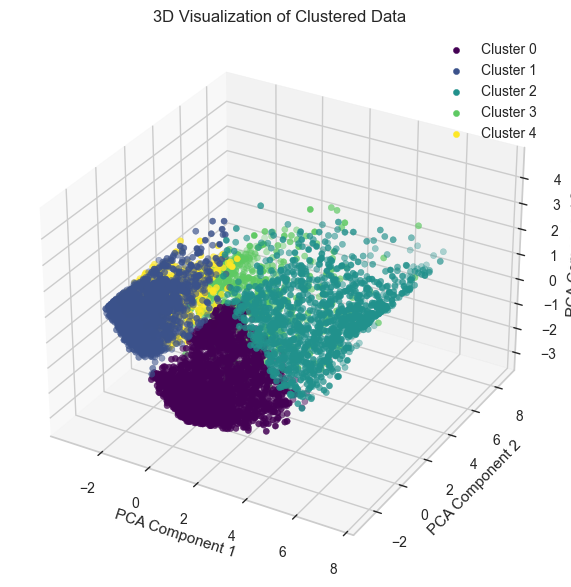

In [29]:
for i in range(3,6):
    pca_components, kmeans_model = k_means_pipeline(data_scaled, n_clusters=i, n_components=3)
    visualize_3d(pca_components, kmeans_model)

## Pipeline Agglomerative Clustering

Tương tự pipeline sử dụng agglomerative clustering thay vì kmeans

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

def agglomerative_pipeline(data, n_clusters, n_components):
    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),                # Standardize the data
        ('pca', PCA(n_components=n_components))      # PCA
    ])

    # Fit the pipeline to your data
    data_scaled_pca = pipeline.fit_transform(data)
    
    # Apply Agglomerative Clustering
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative_clustering.fit_predict(data_scaled_pca)
    
    return data_scaled_pca, labels


### Visualize

In [31]:

def visualize_2d(pca_components, labels):
    # Plot the data in 2D
    plt.figure(figsize=(12, 7))
    ax = plt.subplot()
    group = labels
    unique_groups = np.unique(group)

    # Use a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))

    for g, color in zip(unique_groups, colors):
        ix = np.where(group == g)
        ax.scatter(pca_components[ix, 0], pca_components[ix, 1], label=f'Cluster {g}', c=[color])
    
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    plt.title("2D Visualization of Clustered Data")
    plt.legend()
    plt.show


def visualize_interaction_3d(pca_components, labels):
    # Create a 3D scatter plot using Plotly
    fig = px.scatter_3d(
        x=pca_components[:, 0], 
        y=pca_components[:, 1], 
        z=pca_components[:, 2], 
        color=labels.astype(str),
        title="3D Visualization of Clustered Data",
        labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'z': 'PCA Component 3'},
        width=800, 
        height=400,
        color_continuous_scale='viridis'  # Use viridis colormap
    )
    
    # Tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

def visualize_3d(pca_components, labels):
    # Plot the data in 3D
    plt.figure(figsize=(12, 7))
    ax = plt.subplot(projection="3d")
    group = labels
    unique_groups = np.unique(group)

    # Use a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))

    for g, color in zip(unique_groups, colors):
        ix = np.where(group == g)
        ax.scatter(pca_components[ix, 0], pca_components[ix, 1],pca_components[ix, 2], label=f'Cluster {g}', c=[color])
    
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")

    plt.title("3D Visualization of Clustered Data")
    plt.legend()
    plt.show()

### 2-dimensional

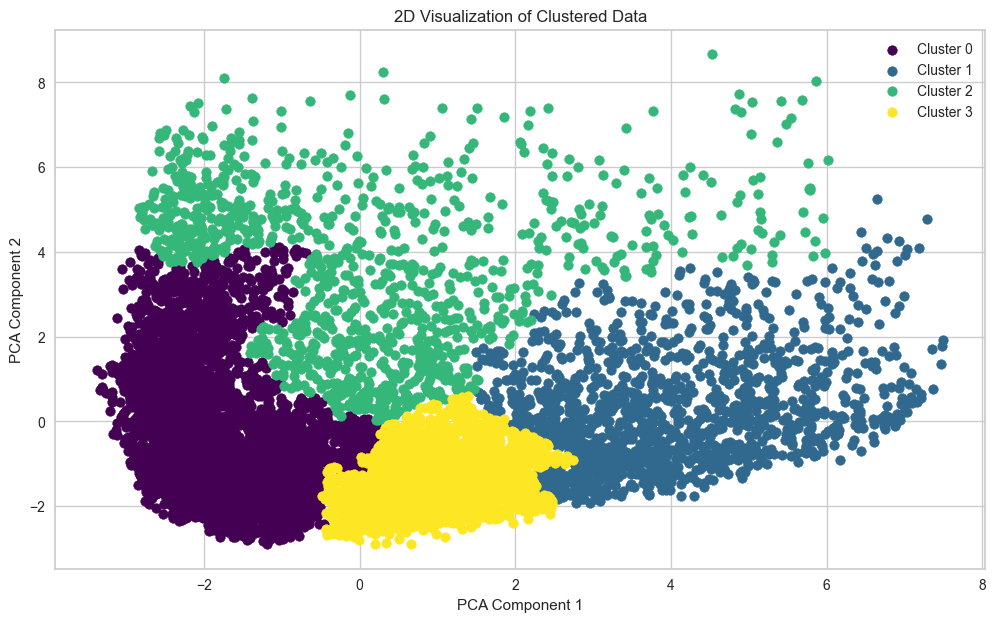

In [32]:
pca_components, labels = agglomerative_pipeline(data, n_clusters=4, n_components=2)
visualize_2d(pca_components, labels)

Các cụm bị lẫn lên nhau => không hiệu quả

### 3-dimensional

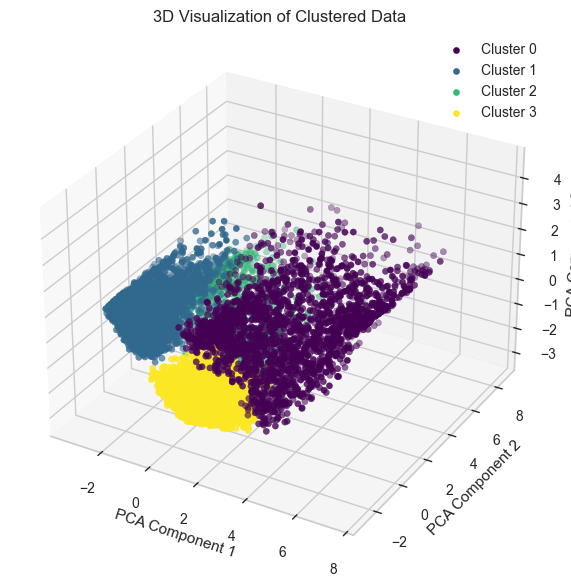

In [33]:
pca_components, labels = agglomerative_pipeline(data, n_clusters=4, n_components=3)
visualize_interaction_3d(pca_components, labels)
visualize_3d(pca_components, labels)

## Save & Load Model

Vì kmeans cho kết quả rõ ràng hơn nên ta lưu nó lại

In [34]:
pca_components, kmeans_model = k_means_pipeline(data_scaled, n_clusters=4, n_components=3)

In [35]:
import pickle 
file_name = "model.sav" 
pickle.dump(kmeans_model, open(file_name, "wb"))

In [36]:
file_name = "model.sav"
model = pickle.load(open(file_name, "rb"))

In [37]:
cluster = model.labels_
cluster_0 = np.where(cluster==0)
cluster_1 = np.where(cluster==1)
cluster_2 = np.where(cluster==2)
cluster_3 = np.where(cluster==3)

In [38]:
data.iloc[cluster_0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,3.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,3.0
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0.0,12.0,1200.0,1083.301007,2172.697765,0.000000,12.0,3.0
13,921.693369,1.000000,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0.0,26.0,7500.0,1655.891435,251.137986,0.083333,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,475.523262,82.771320,0.571428,12.0,3.0
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,94.488828,86.283101,0.250000,12.0,3.0
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,325.594462,48.886365,0.500000,12.0,3.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,275.861322,864.206542,0.000000,12.0,3.0


In [52]:
# Create a DataFrame for the cluster labels
labels_df = pd.DataFrame(model.labels_, columns=['Cluster'])

tmp = pd.concat([data.iloc[:, :-1], labels_df], axis=1)

In [66]:
clusters = tmp.groupby('Cluster').mean()
clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,681.488833,0.936782,846.332743,252.004167,571.255680,158.101291,0.875679,0.189008,0.738045,0.035740,0.647554,17.844419,3532.519210,969.106617,473.275292,0.203036,12.0
1,4161.395972,0.972741,379.542731,223.280959,144.410349,3078.278833,0.262705,0.115709,0.166124,0.447570,10.174292,5.876543,6998.659801,2531.642216,1437.702216,0.028178,12.0
2,909.866647,0.840447,256.630495,197.812456,56.836949,528.852440,0.172651,0.087485,0.081662,0.107061,1.922202,2.899709,3202.222224,868.832745,454.030699,0.065573,12.0
3,2235.452821,0.975659,3226.689762,1794.051596,980.511613,486.703281,0.919920,0.702557,0.673715,0.075651,1.612054,43.303905,7819.524618,3452.642671,809.504028,0.199614,12.0


# **Discussion & Conclusion**

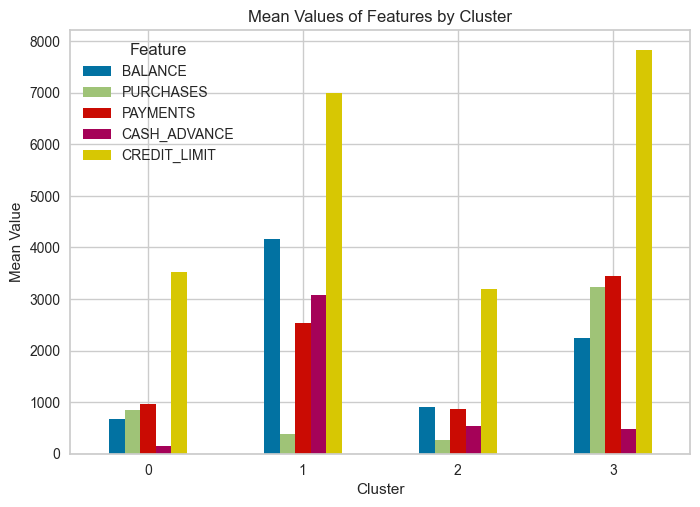

In [67]:
# Plot the mean values for each cluster
clusters[['BALANCE','PURCHASES','PAYMENTS','CASH_ADVANCE','CREDIT_LIMIT']].plot(kind='bar')

# Customize the plot
plt.title('Mean Values of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature')

# Show the plot
plt.show()

Plot trên thể hiện rõ sự phân hoá của các cụm

In [39]:
def get_conclusions():
    return """
    - Ở bài tập tuần này, em tạo 2 pipeline sử dụng hai thuật toán phân cụm K-means và Agglomerative Cluster. Trong đó K-Means cho kết quả tốt hơn
    - Sử dụng Elbow, Silhouette Score, Dendrogram (cho agglomerative) tìm số cụm tối ưu
    - Pipeline gồm: chuẩn hoá z-score, pca, cluster model (k-means hoặc agglomerative).
    - Visualize 2-PC và 3-PC (2 phiên bản)
    - Trước đó em có khử outliers sử dụng khoảng tứ phân vị (IQR) v.v
    - Lưu và load model
    """
print(get_conclusions())


    - EDA
    - Ở bài tập tuần này, em tạo 2 pipeline sử dụng hai thuật toán phân cụm K-means và Agglomerative Cluster. Trong đó K-Means cho kết quả tốt hơn
    - Sử dụng Elbow, Silhouette Score, Dendrogram (cho agglomerative) tìm số cụm tối ưu
    - Pipeline gồm: chuẩn hoá z-score, pca, cluster model (k-means hoặc agglomerative).
    - Visualize 2-PC và 3-PC (2 phiên bản)
    - Trước đó em có khử outliers sử dụng khoảng tứ phân vị (IQR) v.v
    - Lưu và load model
    
